In [14]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

os.chdir("/Volumes/WebDav/Souce_Code/Python/OpenCV/자율차교육")

def showIMG(imgs, figsize=(100, 100)):
    fig = plt.figure(figsize=figsize)
    idx = 1
    for i in imgs:
        ax = fig.add_subplot(1, len(imgs), idx)
        ax.imshow(cv2.cvtColor(imgs[i], cv2.COLOR_BGR2RGB))
        ax.set_title(i)
        ax.axis("off")
        idx += 1

In [1]:
import cv2

image = cv2.imread("img/moon.jpg", cv2.IMREAD_ANYCOLOR)
cv2.imshow("Moon", image)
cv2.waitKey(0)
cv2.destroyAllWindows()
height, width, channel = image.shape
print(height, width, channel)

1280 1920 3


In [2]:
import cv2

capture = cv2.VideoCapture("img/sea.mp4")

while True:
    if(capture.get(cv2.CAP_PROP_POS_FRAMES) == capture.get(cv2.CAP_PROP_FRAME_COUNT)):
        capture.open("img/sea.mp4")

    ret, frame = capture.read()
    cv2.imshow("TEST", frame)

    if cv2.waitKey(33) > 0:
        break

capture.release()
cv2.destroyAllWindows()

In [1]:
import cv2

img = cv2.imread("img/cat.jpg", cv2.IMREAD_COLOR)
result = cv2.flip(img, 0)

cv2.imshow("img", img)
cv2.imshow("result", result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
import cv2

img = cv2.imread("img/moon.jpg", cv2.IMREAD_COLOR)

height, width, channel = img.shape

result1 = cv2.pyrUp(img)
result2 = cv2.pyrDown(img)

cv2.imshow("img", img)
cv2.imshow("result1", result1)
cv2.imshow("result2", result2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
import cv2

img = cv2.imread("img/moon.jpg", cv2.IMREAD_COLOR)

result1 = cv2.resize(img, dsize=(640, 480), interpolation=cv2.INTER_AREA)
result2 = cv2.resize(img, dsize=(0, 0), fx=0.2, fy=0.2, interpolation=cv2.INTER_LINEAR)

cv2.imshow("img", img)
cv2.imshow("result1", result1)
cv2.imshow("result2", result2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
import cv2

img = cv2.imread("img/Lenna.png", cv2.IMREAD_COLOR)
grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2.imshow("img", img)
cv2.imshow("gray", grayscale)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
import cv2

img = cv2.imread("img/Lenna.png", cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

ret, threshold = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

cv2.imshow("img", img)
cv2.imshow("result", threshold)
cv2.waitKey(0)
cv2.destroyAllWindows()

(-0.5, 511.5, 511.5, -0.5)

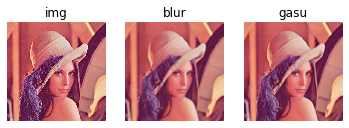

In [8]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("img/Lenna.png", cv2.IMREAD_COLOR)
blur = cv2.blur(img, (9, 9), anchor=(-1, -1), borderType=cv2.BORDER_DEFAULT)
gaus = cv2.GaussianBlur(img, (9, 9), -1)

# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
# plt.imshow(cv2.cvtColor(gaus, cv2.COLOR_BGR2RGB))

fig = plt.figure()
rows = 1
cols = 3

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title("img")
ax1.axis("off")

ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
ax2.set_title("blur")
ax2.axis("off")

ax3 = fig.add_subplot(rows, cols, 3)
ax3.imshow(cv2.cvtColor(gaus, cv2.COLOR_BGR2RGB))
ax3.set_title("gasu")
ax3.axis("off")

(-0.5, 511.5, 511.5, -0.5)

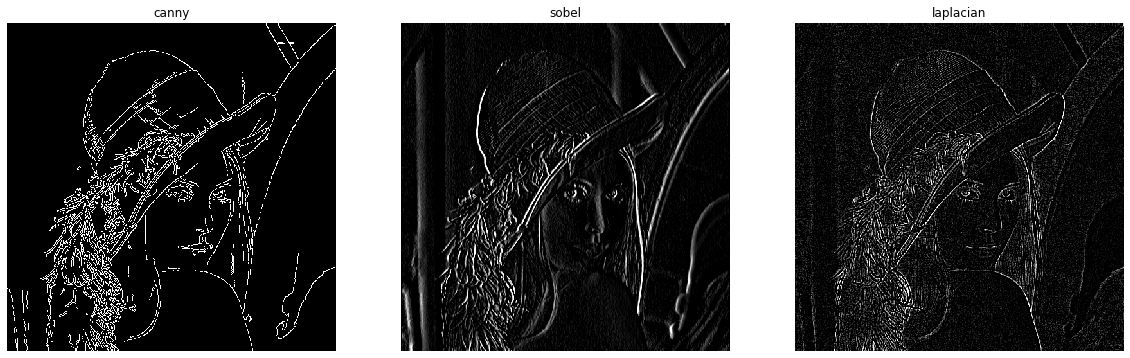

In [8]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("img/Lenna.png", cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

canny = cv2.Canny(img, 100, 255)
sobel = cv2.Sobel(gray, cv2.CV_8U, 1, 0, 3)
laplacian = cv2.Laplacian(gray, cv2.CV_8U, ksize=3)

fig = plt.figure(figsize=(20, 20))
rows = 1
cols = 3

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(cv2.cvtColor(canny, cv2.COLOR_BGR2RGB))
ax1.set_title("canny")
ax1.axis("off")

ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(cv2.cvtColor(sobel, cv2.COLOR_BGR2RGB))
ax2.set_title("sobel")
ax2.axis("off")

ax3 = fig.add_subplot(rows, cols, 3)
ax3.imshow(cv2.cvtColor(laplacian, cv2.COLOR_BGR2RGB))
ax3.set_title("laplacian")
ax3.axis("off")

(-0.5, 749.5, 613.5, -0.5)

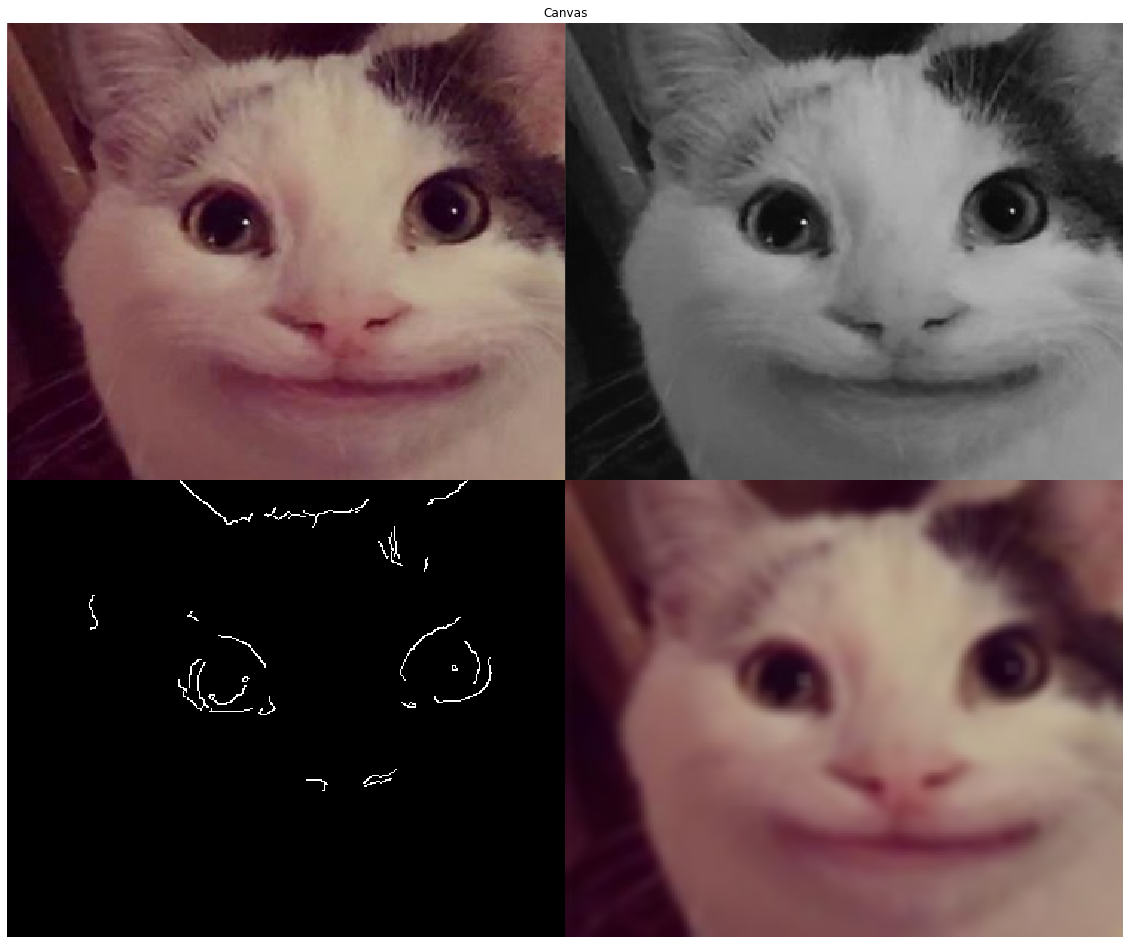

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("img/cat.jpg")
height, width, channel = img.shape

face_img = img[int(height/3) : int(height * 2/3), 0:int(width/2)]
gray_img = cv2.cvtColor(cv2.cvtColor(face_img, cv2.COLOR_BGR2GRAY), cv2.COLOR_GRAY2BGR)
canny_img = cv2.cvtColor(cv2.Canny(gray_img, 125, 255), cv2.COLOR_GRAY2BGR)
blur_img = cv2.blur(face_img, (9, 9), anchor=(-1, -1), borderType=cv2.BORDER_DEFAULT)

height, width, channel = face_img.shape

canvas = np.zeros((height*2, width*2, channel), np.uint8)
canvas[0:height, 0:width] = face_img
canvas[0:height, width:width*2] = gray_img
canvas[height:height*2, 0:width] = canny_img
canvas[height:height*2, width: width*2] = blur_img


fig = plt.figure(figsize=(20, 20))

ax = fig.add_subplot(1, 1, 1)
ax.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))
ax.set_title("Canvas")
ax.axis("off")

(-0.5, 511.5, 511.5, -0.5)

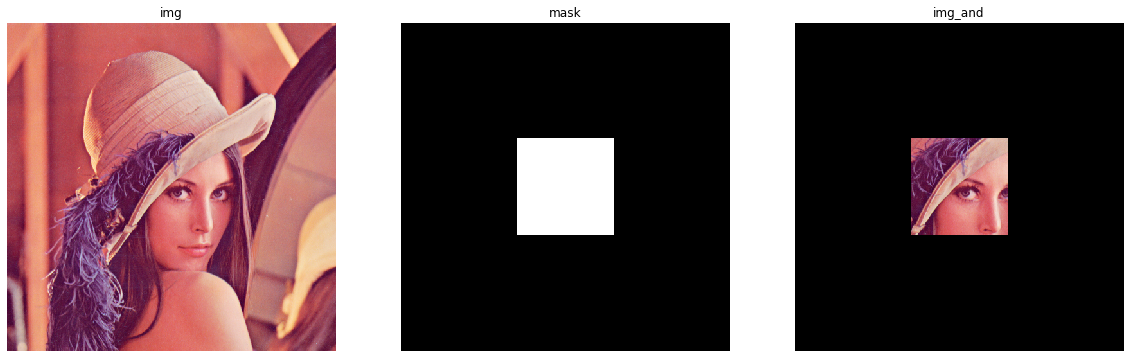

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("img/Lenna.png", cv2.IMREAD_COLOR)

mask = np.zeros(img.shape[:2], dtype="uint8")
(cX, cY) = (img.shape[1] // 2, img.shape[0] // 2)
cv2.rectangle(mask, (cX-75, cY-75), (cX + 75, cY + 75), 255, -1)

img_and = cv2.bitwise_and(img, img, mask=mask)

fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title("img")
ax1.axis("off")

ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
ax2.set_title("mask")
ax2.axis("off")

ax3 = fig.add_subplot(1, 3, 3)
ax3.imshow(cv2.cvtColor(img_and, cv2.COLOR_BGR2RGB))
ax3.set_title("img_and")
ax3.axis("off")

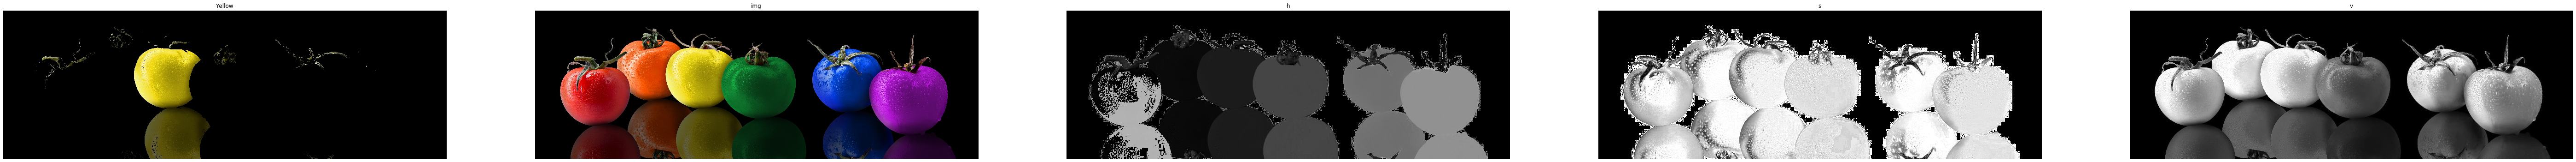

In [11]:
import cv2

img = cv2.imread("img/tomato.jpg", cv2.IMREAD_COLOR)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s ,v = cv2.split(hsv)

y_h = cv2.inRange(h, 25, 35)
yellow = cv2.bitwise_and(hsv, hsv, mask = y_h)
yellow = cv2.cvtColor(yellow, cv2.COLOR_HSV2BGR)

imgs = {"Yellow" : yellow, "img" : img, "h" : h, "s" : s, "v" : v}

showIMG(imgs, figsize=(100, 100))


In [17]:
import cv2

img = cv2.imread("img/tomato.jpg", cv2.IMREAD_COLOR)
b, g, r = cv2.split(img)

imgs = {"r":r, "g":g, "b":b}

showIMG(imgs)

meg = cv2.merge((b, g, r))

imgs = {"merge img":meg}

showIMG(imgs)

meg2 = cv2.merge((r, g, b))

In [2]:
def nothing(x):
    pass

img = cv2.imread("img/tomato.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2.namedWindow("TEST")
cv2.createTrackbar("control", "TEST", 0, 255, nothing)
cv2.setTrackbarPos("control", "TEST", 0)

while True:
    value = cv2.getTrackbarPos("control", "TEST")

    ret, thre = cv2.threshold(gray, value, 255, cv2.THRESH_BINARY)
    cv2.imshow("TEST", thre)

    if cv2.waitKey(1) & 0xff == ord("q"):
        break

cv2.destroyAllWindows()

In [4]:
def nothing(x):
    pass

def create_control_window():
    cv2.namedWindow("Control")
    cv2.createTrackbar("h_max", "Control", 0, 255, nothing)
    cv2.createTrackbar("h_min", "Control", 0, 255, nothing)
    cv2.createTrackbar("s_max", "Control", 0, 255, nothing)
    cv2.createTrackbar("s_min", "Control", 0, 255, nothing)
    cv2.createTrackbar("v_max", "Control", 0, 255, nothing)
    cv2.createTrackbar("v_min", "Control", 0, 255, nothing)

    cv2.setTrackbarPos("h_max", "Control", 255)
    cv2.setTrackbarPos("h_min", "Control", 0)
    cv2.setTrackbarPos("s_max", "Control", 255)
    cv2.setTrackbarPos("s_min", "Control", 0)
    cv2.setTrackbarPos("v_max", "Control", 255)

def get_control_value():
    h_min = cv2.getTrackbarPos("h_min", "Control")
    h_max = cv2.getTrackbarPos("h_max", "Control")
    s_min = cv2.getTrackbarPos("s_min", "Control")
    s_max = cv2.getTrackbarPos("s_max", "Control")
    v_min = cv2.getTrackbarPos("v_min", "Control")
    v_max = cv2.getTrackbarPos("v_max", "Control")

    high_val = (h_max, s_max, v_max)
    low_val = (h_min, s_min, v_min)

    return high_val, low_val

img = cv2.imread("img/tomato.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

create_control_window()

while True:
    high_val, low_val = get_control_value()
    mask = cv2.inRange(hsv, low_val, high_val)
    cv2.imshow("mask", mask)

    result = cv2.bitwise_and(hsv, hsv, mask=mask)
    result = cv2.cvtColor(result, cv2.COLOR_HSV2BGR)

    cv2.imshow("Result", result)
    if cv2.waitKey(1) & 0xff == ord("q"):
        break

cv2.destroyAllWindows()

In [4]:
img = cv2.imread("img/tomato.jpg", cv2.IMREAD_COLOR)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s ,v = cv2.split(hsv)

r_h = cv2.inRange(h, 170, 255)
red = cv2.bitwise_and(hsv, hsv, mask = r_h)
red = cv2.cvtColor(red, cv2.COLOR_HSV2BGR)

o_h = cv2.inRange(h, 7, 15)
orange = cv2.bitwise_and(hsv, hsv, mask = o_h)
orange = cv2.cvtColor(orange, cv2.COLOR_HSV2BGR)

y_h = cv2.inRange(h, 25, 35)
yellow = cv2.bitwise_and(hsv, hsv, mask = y_h)
yellow = cv2.cvtColor(yellow, cv2.COLOR_HSV2BGR)

g_h = cv2.inRange(h, 65, 75)
green = cv2.bitwise_and(hsv, hsv, mask = g_h)
green = cv2.cvtColor(green, cv2.COLOR_HSV2BGR)

b_h = cv2.inRange(h, 95, 125)
blue = cv2.bitwise_and(hsv, hsv, mask = b_h)
blue = cv2.cvtColor(blue, cv2.COLOR_HSV2BGR)

p_h = cv2.inRange(h, 140, 160)
puple = cv2.bitwise_and(hsv, hsv, mask = p_h)
puple = cv2.cvtColor(puple, cv2.COLOR_HSV2BGR)

while True:
    cv2.imshow("A", red)
    cv2.waitKey(1000)
    cv2.imshow("A", orange)
    cv2.waitKey(1000)
    cv2.imshow("A", yellow)
    cv2.waitKey(1000)
    cv2.imshow("A", green)
    cv2.waitKey(1000)
    cv2.imshow("A", blue)
    cv2.waitKey(1000)
    cv2.imshow("A", puple)
    cv2.waitKey(1000)


In [18]:
def mouse_callback(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        print(x, y)

# canvas = np.zeros((500, 500, 3), np.uint8)
img = cv2.imread("img/road.jpg", cv2.IMREAD_COLOR)

cv2.imshow("TEST", img)
cv2.setMouseCallback("TEST", mouse_callback)
cv2.waitKey(0)
cv2.destroyAllWindows()

449 410
624 462
656 430
1202 697


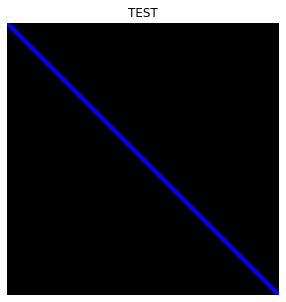

In [3]:
canvas = np.zeros((500, 500, 3), np.uint8)

cv2.line(canvas, (0, 0), (499, 499), (255, 0, 0), 5)

showIMG({"TEST":canvas}, figsize=(5, 5))

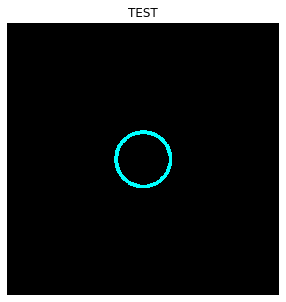

In [4]:
canvas = np.zeros((500, 500, 3), np.uint8)

cv2.circle(canvas, (250, 250), 50, (255, 255, 0), 5)

showIMG({"TEST":canvas}, figsize=(5, 5))

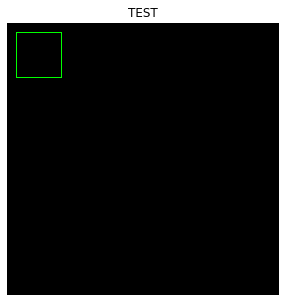

In [5]:
green = (0, 255, 0)
canvas = np.zeros((300, 300, 3), dtype="uint8")

cv2.rectangle(canvas, (10, 10), (60, 60), green)

showIMG({"TEST":canvas}, figsize=(5, 5))

In [3]:
def mouse_callback(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.rectangle(param, (x, y), (x+200, y+200), (255, 0, 0))
        cv2.imshow("TEST", param)
        cv2.imshow("cut", param[y:y+200, x:x+200])

canvas = np.zeros((500, 500, 3), np.uint8)
cv2.circle(canvas, (250, 250), 50, (255, 255, 0), 5)

cv2.imshow("TEST", canvas)
cv2.setMouseCallback("TEST", mouse_callback, canvas)
cv2.waitKey(0)
cv2.destroyAllWindows()

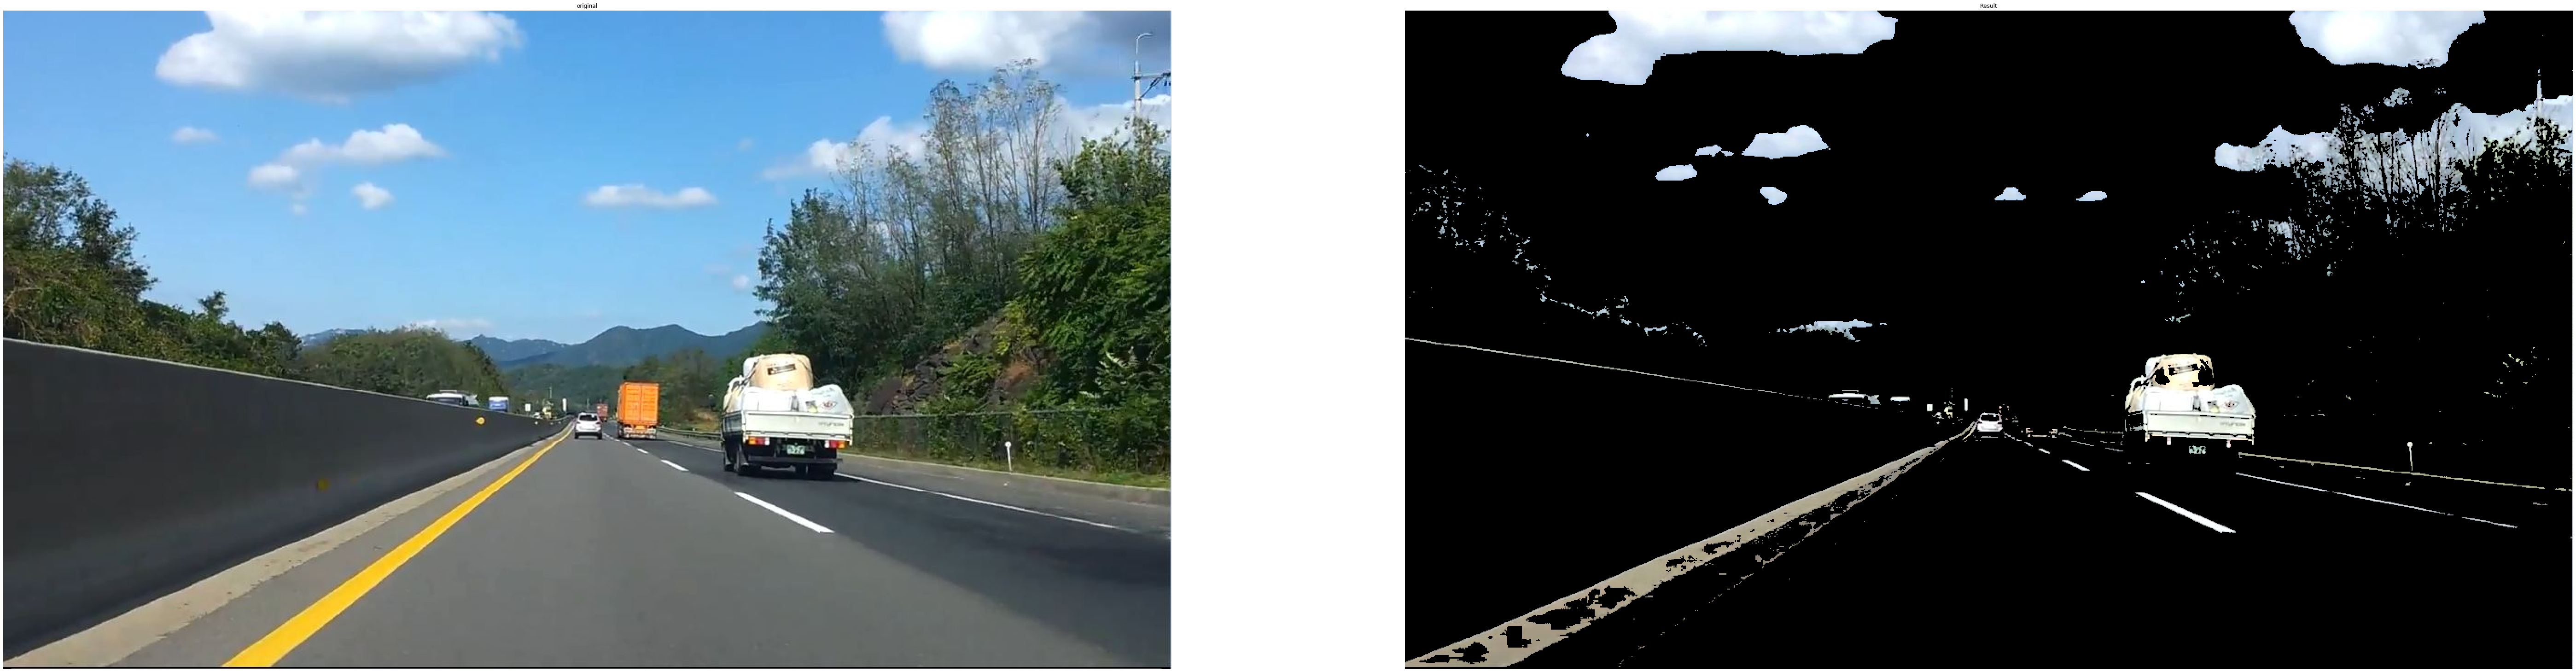

In [2]:
img = cv2.imread("img/road.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

mask = cv2.inRange(hsv, (0, 0, 140), (199, 55, 255))
mask = cv2.bitwise_and(hsv, hsv, mask=mask)
result = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)

showIMG({"original":img, "Result":result})


In [35]:
img = cv2.imread("img/road.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

mask = cv2.inRange(hsv, (0, 0, 140), (199, 55, 255))
mask = cv2.bitwise_and(hsv, hsv, mask=mask)
result = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)

mask = np.zeros_like(img, dtype=np.uint8)


if len(img.shape) > 2:
    channel_count = img.shape[2]
    ignore_mask_color = (255,) * channel_count
else:
    ignore_mask_color = 255

# vertices = np.array([[720, 230], [470, 600], [470, 700], [720, 1240]], np.int32)
vertices = np.array([[0, 0], [10, 10], [20, 20], [30, 30]], np.uint8)

cv2.fillPoly(mask, vertices, (255, 255, 255))


error: OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/drawing.cpp:2403: error: (-215:Assertion failed) p.checkVector(2, CV_32S) >= 0 in function 'fillPoly'


In [30]:
!pwd

/Volumes/WebDav/Souce_Code/Python/OpenCV/자율차교육
